In [18]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from matplotlib import pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
Dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/news.csv")
Dataset

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [22]:
Training_Dataset = Dataset[0:(int)(0.8*6335)]
Training_Dataset

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
5063,9395,Someone Just Donated $2.5 Million to Bail Out ...,By Nick Bernabe \nFollowing the recent mass ar...,FAKE
5064,5744,What Does Washington ‘Plan B’ in Syria Really ...,"10 Comments on ""What Does Washington ‘Plan B’ ...",FAKE
5065,3298,"McConnell, after his no-shutdowns pledge, quic...",Less than six weeks on his powerful Capitol Hi...,REAL
5066,10202,Russell Brand’s Back on ‘The Trews’ and He’s G...,$23 Russell Brand’s Back on ‘The Trews’ and He...,FAKE


In [23]:
Test_Set = Dataset[(int)(0.8*6335):]
Test_Set

,Unnamed: 0,title,text,label
5068,10319,Putin: Russia Is Not Going To Attack Anyone,Complaining about Western “hysteria” surroundi...,FAKE
5069,4153,How to Tell Debt Facts From Political Hype,"Recent remarks by Donald Trump, the presumptiv...",REAL
5070,5042,Trump on Twitter: Hillary is 'Brainwashed',Donald Trump took to Twitter Saturday morning ...,REAL
5071,2927,Poll: Most disapprove of Obama handling of ISIS,Washington (CNN) Americans are increasingly un...,REAL
5072,10249,The Trump – Epstein Rape Lawsuit,"Posted on November 3, 2016 by Michael Collins ...",FAKE
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [0]:
# X_train = Training_Dataset.iloc[:,[1,2]].values
# X_test = Test_Set.iloc[:,[1,2]].values
# create the transform
vectorizer = CountVectorizer()
# tokenize 
X_train = vectorizer.fit_transform(Training_Dataset['text']+Training_Dataset['title'])
# X_test = vectorizer.transform(X_test.ravel())
X_test = vectorizer.transform(Test_Set['text']+Test_Set['title'])

In [25]:
print(X_train.shape)
print(X_test.shape)


(5068, 62279)
(1267, 62279)


In [26]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()   
Training_Dataset['label']= label_encoder.fit_transform(Training_Dataset['label']) 
Y_train = Training_Dataset.iloc[:,3].values

Test_Set['label'] = label_encoder.fit_transform(Test_Set['label'])
Y_test = Test_Set.iloc[:,3].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5068, 62279)
(5068,)
(1267, 62279)
(1267,)


In [33]:
# Training model
from sklearn.tree import DecisionTreeClassifier

Decision_Tree_Classifier = DecisionTreeClassifier(criterion = "entropy")
Decision_Tree_Classifier.fit(X_train, Y_train)

from sklearn.linear_model import LogisticRegression
Logistic_Regression_Classifier = LogisticRegression(random_state= 0)
Logistic_Regression_Classifier.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix of Decision Tree Classifier's training model:  [[2520    0]
 [   0 2548]]
Confusion matrix of Decision Tree Classifier's testing model:  [[515 129]
 [121 502]]
Confusion matrix of Logistic Regression Classifier's training model:  [[2520    0]
 [   0 2548]]
Confusion matrix of Logistic Regression Classifier's testing model:  [[587  57]
 [ 43 580]]


Text(0.5, 1.0, 'Confusion Matrix of Test Set - Logistic Regression')

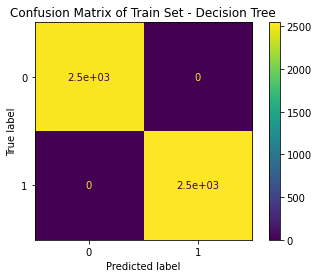

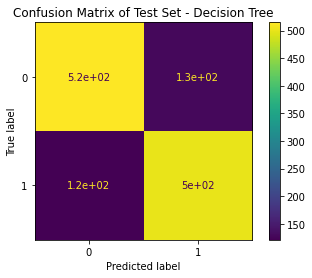

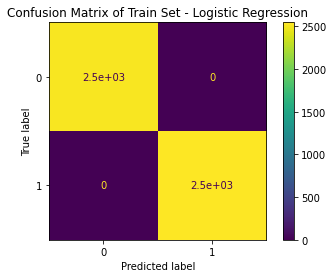

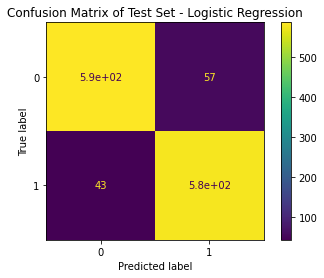

In [44]:
# Evaluating training and testing model
from sklearn.metrics import confusion_matrix, r2_score, plot_confusion_matrix

cm = confusion_matrix(Y_train, Decision_Tree_Classifier.predict(X_train))
plot_confusion_matrix(Decision_Tree_Classifier, X_train, Y_train)
plt.title('Confusion Matrix of Train Set - Decision Tree')
print("Confusion matrix of Decision Tree Classifier's training model: ",cm)

cm = confusion_matrix(Y_test, Decision_Tree_Classifier.predict(X_test))
print("Confusion matrix of Decision Tree Classifier's testing model: ",cm)
plot_confusion_matrix(Decision_Tree_Classifier, X_test, Y_test)
plt.title('Confusion Matrix of Test Set - Decision Tree')

cm = confusion_matrix(Y_train, Logistic_Regression_Classifier.predict(X_train))
plot_confusion_matrix(Logistic_Regression_Classifier, X_train, Y_train)
plt.title('Confusion Matrix of Train Set - Logistic Regression')

print("Confusion matrix of Logistic Regression Classifier's training model: ",cm)

cm = confusion_matrix(Y_test, Logistic_Regression_Classifier.predict(X_test))

print("Confusion matrix of Logistic Regression Classifier's testing model: ",cm)
plot_confusion_matrix(Logistic_Regression_Classifier, X_test, Y_test)
plt.title('Confusion Matrix of Test Set - Logistic Regression')


In [36]:
accuracy_score = Decision_Tree_Classifier.score(X_test, Y_test)
print("Accuracy of Decision Tree Classifier's train model: ", Decision_Tree_Classifier.score(X_train,Y_train))
print("Accuracy of Decision Tree Classifier's test model: ",accuracy_score)

accuracy_score = Logistic_Regression_Classifier.score(X_test, Y_test)
print("Accuracy of Logistic Regression Classifier's train model: ", Logistic_Regression_Classifier.score(X_train,Y_train))
print("Accuracy of Logistic Regression Classifier's test model: ",accuracy_score)

Accuracy of Decision Tree Classifier's train model:  1.0
Accuracy of Decision Tree Classifier's test model:  0.8026835043409629
Accuracy of Logistic Regression Classifier's train model:  1.0
Accuracy of Logistic Regression Classifier's test model:  0.9210734017363852
